<a href="https://colab.research.google.com/github/GenoKiller777/AprendizajeSupervisado/blob/main/CART_CasoKyphosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving titanic.csv to titanic.csv
User uploaded file "titanic.csv" with length 61194 bytes


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('kyphosis.csv')

In [7]:
df.shape

(81, 4)

In [8]:
df.head(3)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5


In [9]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


## Realice un análisis exploratorio de los datos

### ¿Qué porcentaje de la muestra presenta Cifosis?

**R.-** _Aproximandamente un **21%** de la muestra presenta Cifosis._

In [11]:
df['Kyphosis'].value_counts()/sum(df['Kyphosis'].value_counts())*100

absent     79.012346
present    20.987654
Name: Kyphosis, dtype: float64

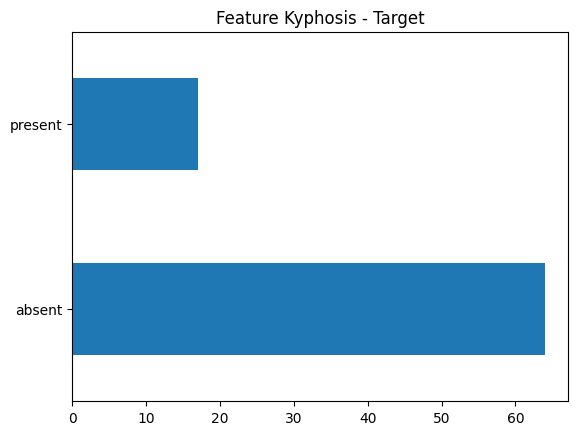

In [12]:
df['Kyphosis'].value_counts().plot(kind = 'barh')

plt.title('Feature Kyphosis - Target')
plt.show()

### ¿Cuál es la edad promedio de niños con cifosis?

**R.-** _**No** hay niños en la muestra que presenten Cifosis._

In [13]:
condiciones = [
    (df['Age'] < 6),
    (df['Age'] >= 6) & (df['Age'] < 12),
    (df['Age'] >= 12) & (df['Age'] < 20),
    (df['Age'] >= 20) & (df['Age'] < 25),
    (df['Age'] >= 25) & (df['Age'] < 60),
    (df['Age'] > 60)
    ]

# create a list of the values we want to assign for each condition
valores = ['Infancia', 'Niñez', 'Adolescencia', 'Juventud','Adultez', 'Vejez']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Age_etiquet'] = np.select(condiciones, valores)

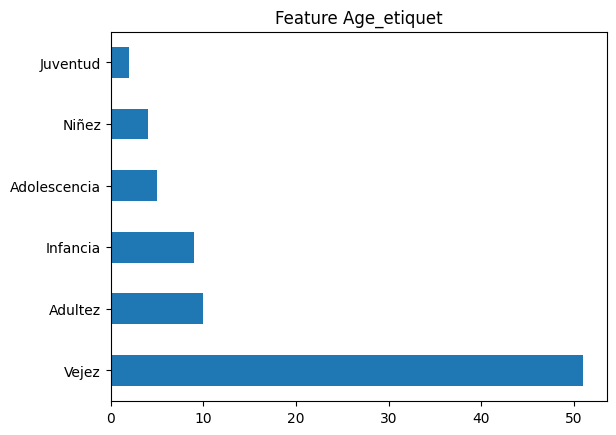

In [14]:
df['Age_etiquet'].value_counts().plot(kind = 'barh')

plt.title('Feature Age_etiquet')
plt.show()

In [15]:
df.loc[(df['Age_etiquet'] == 'Niñez') & (df['Kyphosis'] == 'present')]

#No hay niños con Cifosis

,Kyphosis,Age,Number,Start,Age_etiquet


In [16]:
df.loc[(df['Age_etiquet'] == 'Niñez') & (df['Kyphosis'] == 'absent')]

,Kyphosis,Age,Number,Start,Age_etiquet
25,absent,9,5,13,Niñez
26,absent,8,3,6,Niñez
51,absent,9,2,17,Niñez
74,absent,11,3,15,Niñez


## Pre - Procesamiento

In [17]:
df['Target'] = np.where(df['Kyphosis'] == 'present', 1, 0)

In [18]:
df

,Kyphosis,Age,Number,Start,Age_etiquet,Target
0,absent,71,3,5,Vejez,0
1,absent,158,3,14,Vejez,0
2,present,128,4,5,Vejez,1
3,absent,2,5,1,Infancia,0
4,absent,1,4,15,Infancia,0
...,...,...,...,...,...,...
76,present,157,3,13,Vejez,1
77,absent,26,7,13,Adultez,0
78,absent,120,2,13,Vejez,0
79,present,42,7,6,Adultez,1


## Formulación del modelo

In [19]:
X = df[['Age','Number','Start']]

y = df['Target']

### Validación Cruzada

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state = 33)

## Modelo Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [23]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [24]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

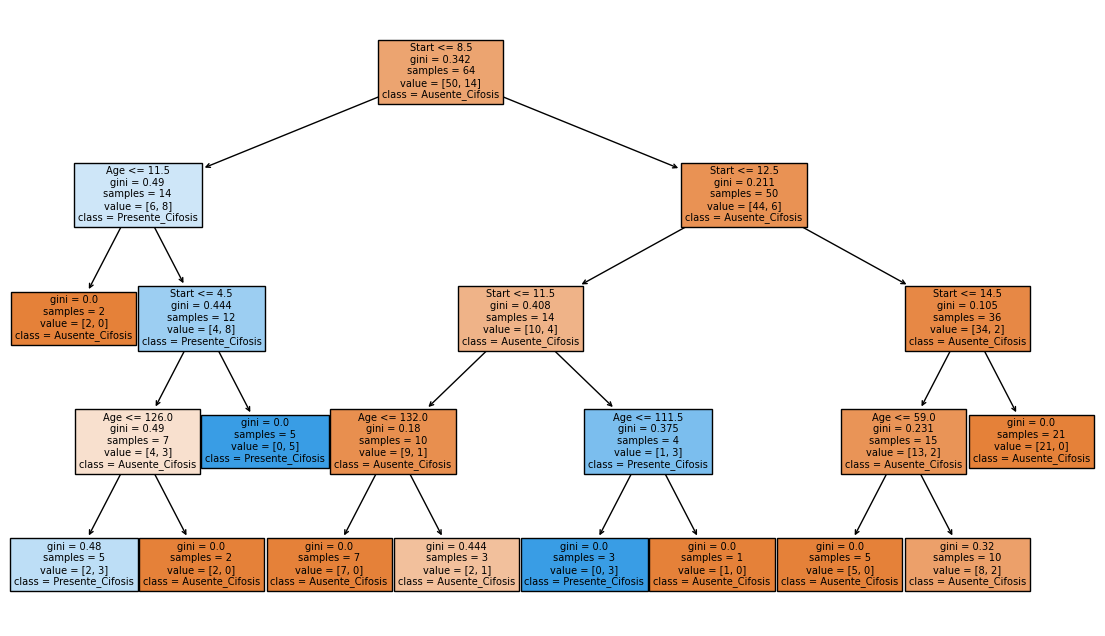

In [25]:
plt.figure(figsize=(14,8))
plot_tree(clf, feature_names=X.columns,
               class_names=['Ausente_Cifosis','Presente_Cifosis'],
               filled=True)
plt.show()

In [26]:
pd.DataFrame(clf.feature_importances_, index=X.columns,
                    columns=['Importancia'])

,Importancia
Age,0.320293
Number,0.000000
Start,0.679707


### Evaluación Modelo Decision Tree

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
y_pred = clf.predict(X_test)

In [29]:
# desempeño en el set de entrenamiento
accuracy_score(y_train, clf.predict(X_train))

0.921875

In [30]:
# desempeño en el set de test
accuracy_score(y_test,y_pred)

0.7647058823529411

In [31]:
confusion_matrix(y_test,y_pred)

array([[11,  3],
       [ 1,  2]])

### Evalúe el Performance

* Accuracy
* Sensibilidad
* Especificidad

In [32]:
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test,y_pred)

ac = accuracy_score(y_test,y_pred)
sensit = cm[0,0]/(cm[0,0]+cm[0,1])
specif = cm[1,1]/(cm[1,0]+cm[1,1])

In [33]:
print("Métricas de Decision Tree.")
print('#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#')
print('')
print("Accuracy (Exactitud):",round(ac*100,3),"%.")
print('')
print("Sensitivity:",round(sensit*100,3),"%.")
print('')
print("Especificidad:",round(specif*100,3),"%.")
print('')
print('#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#')

Métricas de Decision Tree.
#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#

Accuracy (Exactitud): 76.471 %.

Sensitivity: 78.571 %.

Especificidad: 66.667 %.

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#


## Decision Tree Balance

In [34]:
df['Target'].value_counts()

0    64
1    17
Name: Target, dtype: int64

In [35]:
from sklearn.utils import resample

df_majority = df[df['Target'] == 0]
df_minority = df[df['Target']== 1]

df_majority_downsampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

In [36]:
df_balanced['Target'].value_counts()

0    17
1    17
Name: Target, dtype: int64

In [37]:
X_balanced = df_balanced[['Age','Number','Start']]

y_balanced = df_balanced['Target']

In [38]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced,
                                                    test_size = 0.20,
                                                    random_state = 33)

In [39]:
clf_balanced = DecisionTreeClassifier(max_depth=4, random_state=0)

In [40]:
clf_balanced.fit(X_train_balanced,y_train_balanced)

DecisionTreeClassifier(max_depth=4, random_state=0)

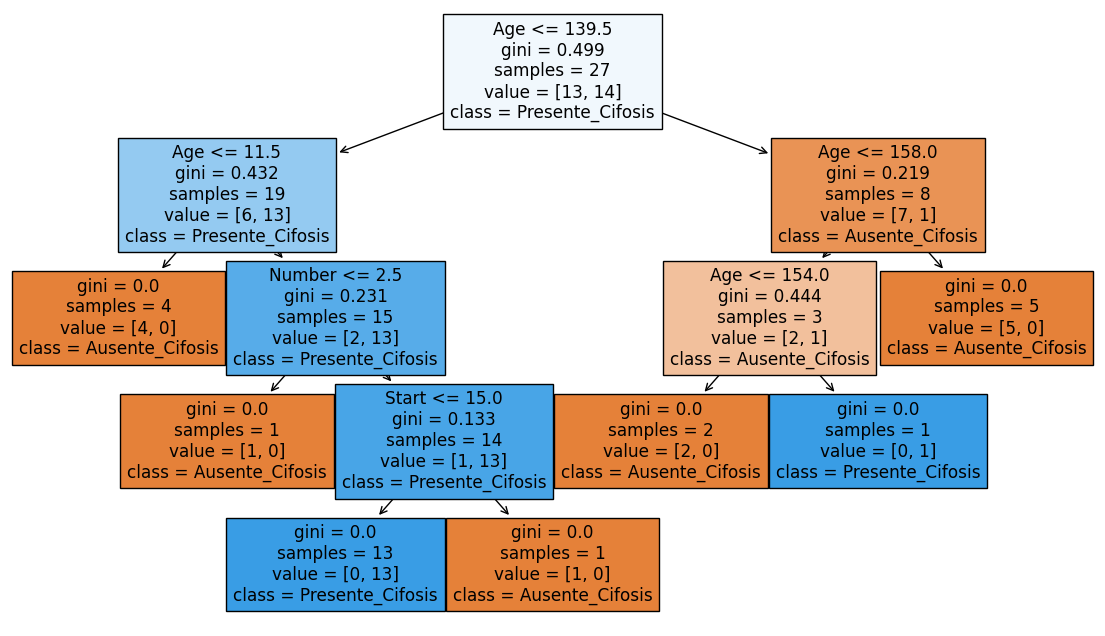

In [41]:
plt.figure(figsize=(14,8))
plot_tree(clf_balanced, feature_names=X_balanced.columns,
               class_names=['Ausente_Cifosis','Presente_Cifosis'],
               filled=True)
plt.show()

In [42]:
pd.DataFrame(clf_balanced.feature_importances_, index=X_balanced.columns,
                    columns=['Importancia'])

,Importancia
Age,0.742857
Number,0.119388
Start,0.137755


In [43]:
y_pred_balanced = clf_balanced.predict(X_test_balanced)

In [44]:
# desempeño en el set de entrenamiento
accuracy_score(y_train_balanced, clf_balanced.predict(X_train_balanced))

1.0

In [45]:
# desempeño en el set de test
accuracy_score(y_test_balanced,y_pred_balanced)

1.0

In [46]:
confusion_matrix(y_test_balanced,y_pred_balanced)

array([[4, 0],
       [0, 3]])

In [47]:
from sklearn.metrics import accuracy_score

cm_balanced = confusion_matrix(y_test_balanced,y_pred_balanced)

ac_balanced = accuracy_score(y_test_balanced,y_pred_balanced)
sensit_balanced = cm_balanced[0,0]/(cm_balanced[0,0]+cm_balanced[0,1])
specif_balanced = cm_balanced[1,1]/(cm_balanced[1,0]+cm_balanced[1,1])

In [48]:
print("Métricas de Decision Tree Balance.")
print('#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#')
print('')
print("Accuracy (Exactitud):",round(ac_balanced*100,3),"%.")
print('')
print("Sensitivity:",round(sensit_balanced*100,3),"%.")
print('')
print("Especificidad:",round(specif_balanced*100,3),"%.")
print('')
print('#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#')

Métricas de Decision Tree Balance.
#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#

Accuracy (Exactitud): 100.0 %.

Sensitivity: 100.0 %.

Especificidad: 100.0 %.

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#


## ¿Afecta el desbalance?

**R.-** _Si se puede mostrar que a a muestra le afecta el desbalance en la perfomance del modelo, se puede apreciar en la importancia de la variable que el desbalanceo pone en lugar al Feature Start y el modelo Balanceado pone el Feature Edad como la más importante, la unica desventaja es la poca cantidad de muestra que se genera cuandoo se le aplica el Balanceo._

## Modelo adjustado Decision Tree

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
tree_param = {'criterion':['gini','entropy','log_loss'],
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
              'splitter':['best', 'random'],
              'min_samples_split':[2,4,6,8,10,12,14,16],
              'min_samples_leaf':[2,4,6,8,10,12,14,16],
              'ccp_alpha':[0.0,0.1,0.001,0.0001,0.00001,0.000001]}

In [51]:
grid = GridSearchCV(DecisionTreeClassifier(), tree_param, refit = True, verbose = 5, cv = 10)

# fitting the model for grid search
grid.fit(X_train, y_train)

Se han truncado las últimas 5000 líneas del flujo de salida.
[CV 1/10] END ccp_alpha=1e-06, criterion=log_loss, max_depth=70, min_samples_leaf=2, min_samples_split=14, splitter=best;, score=0.857 total time=   0.0s
[CV 2/10] END ccp_alpha=1e-06, criterion=log_loss, max_depth=70, min_samples_leaf=2, min_samples_split=14, splitter=best;, score=0.714 total time=   0.0s
[CV 3/10] END ccp_alpha=1e-06, criterion=log_loss, max_depth=70, min_samples_leaf=2, min_samples_split=14, splitter=best;, score=0.714 total time=   0.0s
[CV 4/10] END ccp_alpha=1e-06, criterion=log_loss, max_depth=70, min_samples_leaf=2, min_samples_split=14, splitter=best;, score=0.857 total time=   0.0s
[CV 5/10] END ccp_alpha=1e-06, criterion=log_loss, max_depth=70, min_samples_leaf=2, min_samples_split=14, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END ccp_alpha=1e-06, criterion=log_loss, max_depth=70, min_samples_leaf=2, min_samples_split=14, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END c

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.001, 0.0001, 1e-05, 1e-06],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
                         'splitter': ['best', 'random']},
             verbose=5)

In [52]:
# imprime el mejor parámetro después del ajuste
print(grid.best_params_)
print('')
# imprime cómo se ve nuestro modelo después del ajuste de hiperparámetros
print(grid.best_estimator_)

{'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}

DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=5,
                       min_samples_leaf=4, splitter='random')


In [53]:
clf_tunning = DecisionTreeClassifier(ccp_alpha= 0.001, criterion= 'entropy',
                                     max_depth= 7, min_samples_leaf = 2,
                                     min_samples_split = 6, splitter= 'random')

In [54]:
clf_tunning.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       min_samples_leaf=2, min_samples_split=6,
                       splitter='random')

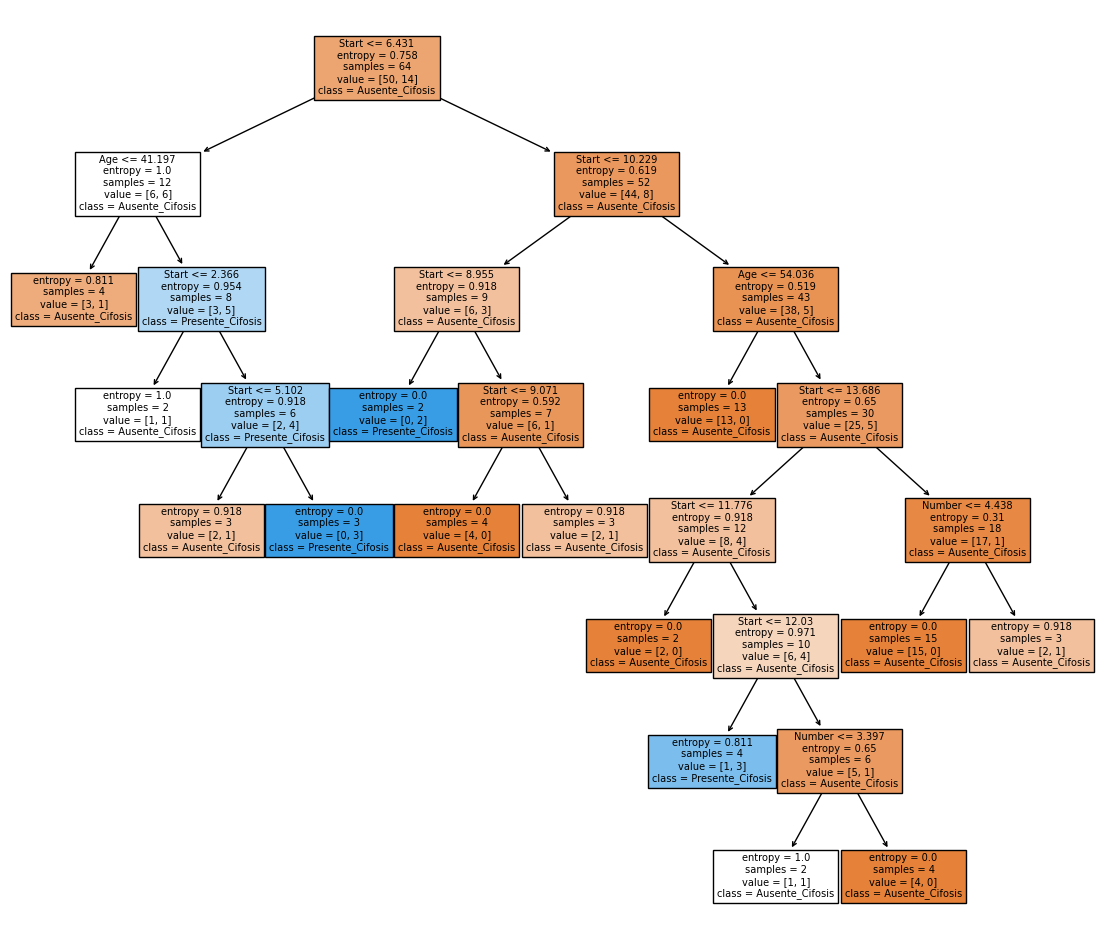

In [55]:
plt.figure(figsize=(14,12))
plot_tree(clf_tunning, feature_names=X.columns,
               class_names=['Ausente_Cifosis','Presente_Cifosis'],
               filled=True)
plt.show()

In [56]:
pd.DataFrame(clf_tunning.feature_importances_, index=X.columns,
                    columns=['Importancia'])

,Importancia
Age,0.131675
Number,0.158559
Start,0.709766


In [57]:
y_pred_dt_tunning = grid.best_estimator_.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred_dt_tunning)

0.7647058823529411

In [59]:
confusion_matrix(y_test,y_pred_dt_tunning)

array([[12,  2],
       [ 2,  1]])

### Modelo Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(n_estimators=50000, random_state=0, class_weight='balanced_subsample')
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=50000,
                       random_state=0)

In [62]:
y_pred_rfc = rfc.predict(X_test)

### Evaluación del Modelo RF

In [63]:
accuracy_score(y_test,y_pred_rfc)

0.7647058823529411

In [64]:
confusion_matrix(y_test,y_pred_rfc)

array([[12,  2],
       [ 2,  1]])